# **MIS 515 HOMEWORK 4: CUSTOMER SERVICE ANALYTICS**

Your assignment is to create atoolthat allows the user to assess the linguistic properties of major companies’ customer service tweets. Yourprogram should first ask the user to specify the type of analysis they would like to perform. Your program should allow the user to perform an unlimited number of analyses.The dataset is available at https://dgoldberg.sdsu.edu/515/customer_service_tweets_full.jsonand contains approximately 1,000 tweets for each of twelve major companies’ customer service Twitter handles, listed alphabetically below:
@amazonhelp @AppleSupport @Ask_Spectrum @AskPlayStation @comcastcares @hulu_support @SpotifyCares @sprintcare @TMobileHelp @Uber_Support @UPSHelp @XboxSupport 

The data is formatted as a JSON array. Your tool should support the following types of analyses:

- Polarity: for each company in the dataset, your tool should calculate the average sentiment polarity across that company’s customer service tweets. Ensure that you calculate sentiment scores per-tweet rather than per-sentence. Average polarity values for each companyshould be printed and displayed visually in a bar graph.
- Subjectivity: for each company in the dataset, your tool should calculate the average sentiment subjectivity across that company’s customer service tweets. Ensure that you calculate sentiment scores per-tweet rather than per-sentence. Average subjectivity values for each company should be printed and displayed visually in a bar graph.
- Readability: ask the user whether they would like to analyze by Flesch-Kincaid Grade Level or SMOGindex. If the user fails to select one of these options, warn them that their choice was invalid.
- Search: ask the user which Twitter handle they would like to search. For that Twitter handle, compute and print the average polarity, average subjectivity, average Flesch-Kincaid Grade Level, and average SMOG index. Your code should handle the case that the user searches for a Twitter handle that is not in the dataset and print an appropriate warning if this occurs.

In [ ]:
#MANAGES ALL PACKAGES AND ORGANIZES DATA 
!pip install syllables
import re, math,requests, json, textblob, syllables, nltk
import matplotlib.pyplot as plt
nltk.download('punkt')


response = requests.get('https://dgoldberg.sdsu.edu/515/customer_service_tweets_full.json')

if response:
  data = json.loads(response.text)
  print(json.dumps(data, indent=4))
else:
  print('Sorry, connectivity issues.')
companies = ["@sprintcare",
               "@ask_spectrum",
               "@askplaystation",
               "@xboxsupport",
               "@upshelp",
               '@amazonhelp', 
               "@applesupport",
               "@uber_support",
               "@spotifycares",  
               "@comcastcares", 
               "@tmobilehelp", 
               "@hulu_support" 
               ]


In [2]:
#CALCULATES VALUES FOR EACH COMPANY SEARCHED
def search(company):
  polarity = 0
  subjectivity = 0
  count = 0
  poly_count = 0
  total_syllables = 0
  total_sentences = 0
  total_words = 0
  fkgls = []
  for i in range(0, len(data)):
    if data[i]['Company'].lower() == company:
      #print(data[i]['Company'])
      text = data[i]['Text']
      count += 1
      blob = textblob.TextBlob(text)
      polarity += blob.polarity
      subjectivity += blob.subjectivity
      ####FKGL
      total_syllables += syllables.estimate(text)
      total_sentences += len(blob.sentences)
      total_words += len(blob.words)
      ### SMOG 
      if syllables.estimate(text) >= 3:
        poly_count += 1
      fkg_level = (0.39 * (total_words / total_sentences)) + (11.8 * (total_syllables / total_words)) - 15.59
      fkgls.append(fkg_level)
  smog_index = (1.043 * math.sqrt(poly_count * (30 / total_sentences))) + 3.1291
  fkg_avg = sum(fkgls) / len(fkgls)
  polarity_avg = polarity / count
  subjectivity_avg = subjectivity / count
  print('Average polarity:', polarity_avg)
  print('Average subjectivity', subjectivity_avg)
  print('Average Flesch-Kincaid Grade Level:', fkg_level)
  print('Average SMOG index:', smog_index)

In [3]:
#CALCULATES AND RETURNS POLARITY
def getPolarity():
  company_polarities = [] 
  for company in companies:
    polarity = 0
    avg = 0
    count = 0
    for i in range(len(data)):
      if data[i]['Company'].lower() == company:
        text = data[i]['Text']
        blob = textblob.TextBlob(text)
        polarity += blob.polarity
        count += 1
    avg = polarity / count
    company_polarities.append(avg)
    print(company + ':', avg)

  plt.bar(companies,company_polarities)
  plt.title('Polarities by Twitter Handle')
  plt.xlabel('Twitter Handle')
  plt.ylabel('Polarity')
  plt.xticks(rotation = 45, ha = "right") 
  plt.show()
  plt.close()


In [4]:
#CALCULATES AND RETURNS SUBJECTIVITY
def getSubjectivity():
  company_subj = [] 
  for company in companies:
    subj = 0
    avg = 0
    count = 0
    for i in range(len(data)):
      if data[i]['Company'].lower() == company:
        text = data[i]['Text']
        blob = textblob.TextBlob(text)
        subj += blob.subjectivity
        count += 1
    avg = subj / count
    company_subj.append(avg)
    print(company + ':', avg)

  plt.bar(companies,company_subj)
  plt.title('Subjectivity by Twitter Handle')
  plt.xlabel('Twitter Handle')
  plt.ylabel('Subjectivity')
  plt.xticks(rotation = 45, ha = "right") 
  plt.show()
  plt.close()


In [5]:
#FKGL FUNCTION THAT CALCULATES THE FKGL  AND RETURNS IT. NO PARAMETERS NEEDED.
def getFKGL():
  company_fkgl = [] 
  for company in companies:
    avg = 0
    count = 0
    total_syllables = 0
    total_sentences = 0
    total_words = 0
    fkg_level = []
    for i in range(len(data)):
      if data[i]['Company'].lower() == company:
        text = data[i]['Text']
        blob = textblob.TextBlob(text)
        total_syllables = syllables.estimate(text)
        total_sentences = len(blob.sentences)
        total_words = len(blob.words)
        fkgl = ((0.39 * (total_words / total_sentences)) + (11.8 * (total_syllables / total_words))) - 15.59
        fkg_level.append(fkgl)
    avg = sum(fkg_level) / len(fkg_level)
    company_fkgl.append(avg)
    print(company + ':', avg)

  plt.bar(companies,company_fkgl)
  plt.title('Flesch-Kincaid Grade Level by Twitter Handle')
  plt.xlabel('Twitter Handle')
  plt.ylabel('Flesch-Kincaid Grade Level')
  plt.xticks(rotation = 45, ha = "right") 
  plt.show()
  plt.close()


In [6]:
#SMOG FUNCTION THAT CALCULATES THE SMOG INDEX AND RETURNS IT. NO PARAMETERS NEEDED.
def getSMOG():
  company_smog = [] 
  poly_count = 0
  total_sentences = 0
  smog_index = 0
  for company in companies:
    avg = 0
    count = 0
    for i in range(len(data)):
      if data[i]['Company'].lower() == company:
        text = data[i]['Text']
        token = text.split('^')
        blob = textblob.TextBlob(token[0])
        total_sentences += len(blob.sentences)
        if syllables.estimate(token[0]) >= 3:
          poly_count += 1
    smog_index = (1.043 * math.sqrt(poly_count * (30 / total_sentences))) + 3.1291
    company_smog.append(smog_index)
    print(company + ':', smog_index)

  plt.bar(companies,company_smog)
  plt.title('SMOG Index by Twitter Handle')
  plt.xlabel('Twitter Handle')
  plt.ylabel('SMOG Index')
  plt.xticks(rotation = 45, ha = "right") 
  plt.show()
  plt.close()


Welcome to the customer service linguistics analyzer!
Which analysis would you like to perform (polarity/subjectivity/readability/search)? polarity
@sprintcare: 0.1441766155603655
@ask_spectrum: 0.2387153826960076
@askplaystation: 0.0799678848003847
@xboxsupport: 0.16134886649230387
@upshelp: -0.020923390993824426
@amazonhelp: 0.012632791606541599
@applesupport: 0.20552694173881667
@uber_support: 0.07891686147186143
@spotifycares: 0.14145763313406176
@comcastcares: 0.21032808897121366
@tmobilehelp: 0.2874421763768641
@hulu_support: 0.07364242688792685


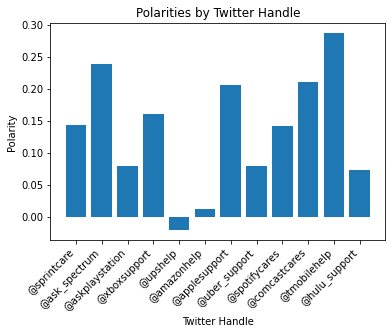

Would you like to run another analysis (yes/no)?yes
Which analysis would you like to perform (polarity/subjectivity/readability/search)? subjectivity
@sprintcare: 0.39555448563011003
@ask_spectrum: 0.5012627272727261
@askplaystation: 0.3657976214526218
@xboxsupport: 0.3698585823204575
@upshelp: 0.4081721997854607
@amazonhelp: 0.4195980200817694
@applesupport: 0.35665619047619057
@uber_support: 0.36302958273208263
@spotifycares: 0.29245743199261076
@comcastcares: 0.43778343633218697
@tmobilehelp: 0.4698157726070234
@hulu_support: 0.4773132454304955


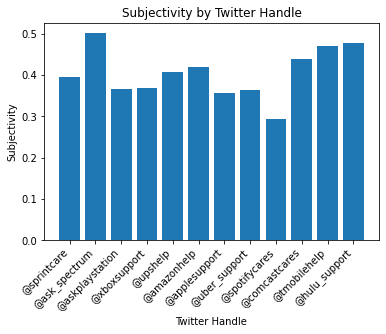

Would you like to run another analysis (yes/no)?yes
Which analysis would you like to perform (polarity/subjectivity/readability/search)? readability
Would you like to analyze FKGL or SMOG?FKGL
@sprintcare: 3.03292755231597
@ask_spectrum: 4.220037957756202
@askplaystation: 5.916860592588254
@xboxsupport: 3.580350040823444
@upshelp: 2.7999036537954005
@amazonhelp: 3.480966816998824
@applesupport: 2.7059316297371927
@uber_support: 3.4990759106428193
@spotifycares: 2.310499516709366
@comcastcares: 3.042128208084338
@tmobilehelp: 2.8096163639219123
@hulu_support: 4.664881752457174


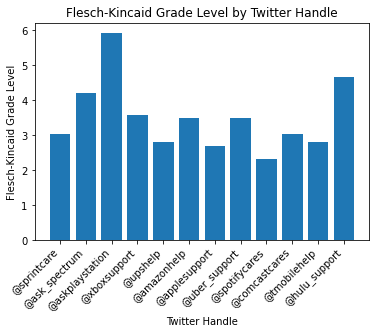

Would you like to run another analysis (yes/no)?yes
Which analysis would you like to perform (polarity/subjectivity/readability/search)? readability
Would you like to analyze FKGL or SMOG?SMOG
@sprintcare: 6.407644732205509
@ask_spectrum: 6.6347982396248515
@askplaystation: 6.808016591089027
@xboxsupport: 6.884393085134903
@upshelp: 6.929345443181061
@amazonhelp: 6.958370381757904
@applesupport: 6.906555548207496
@uber_support: 6.936401192470101
@spotifycares: 6.861208744474544
@comcastcares: 6.811041222829411
@tmobilehelp: 6.76261365572455
@hulu_support: 6.745699175426475


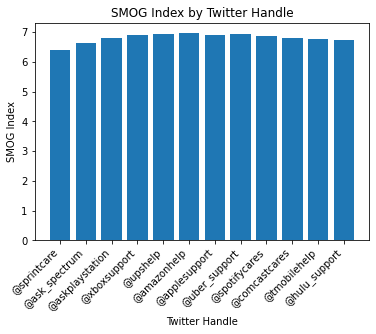

Would you like to run another analysis (yes/no)?yes
Which analysis would you like to perform (polarity/subjectivity/readability/search)? search
Which Twitter handle would you like to search?@upshelp
Average polarity: -0.020923390993824426
Average subjectivity 0.4081721997854607
Average Flesch-Kincaid Grade Level: 2.9357959224877987
Average SMOG index: 6.455568476936238
Would you like to run another analysis (yes/no)?no


In [8]:
##MAIN FUNCTION THAT CALLS ALL CODE AND MANAGES INPUT FROM USER
print('Welcome to the customer service linguistics analyzer!')
choice = True
while choice:
  user_input = input('Which analysis would you like to perform (polarity/subjectivity/readability/search)? ')
  if user_input.lower() == 'polarity':
    getPolarity()
  elif user_input.lower() == 'subjectivity':
    getSubjectivity()
  
  elif user_input.lower() == 'readability':
    read_input = input('Would you like to analyze FKGL or SMOG?')
    if read_input.lower() == 'fkgl':
      getFKGL()
    elif read_input.lower() == 'smog':
      getSMOG()
    else:
      print('Sorry, that type of analysis is not supported. Please try again.') 
  elif user_input.lower() == 'search':
    handle_input = input('Which Twitter handle would you like to search?')
    if handle_input.lower() in companies:
      search(handle_input.lower())  
    else:
      print('Sorry, that Twitter handle was not found. Please try again.')
  else:
    print('Sorry, that type of analysis is not supported. Please try again.')
  
  choice_input = input('Would you like to run another analysis (yes/no)?')
  if choice_input.lower() == 'yes':
    choice = True
  else:
    choice = False
